## K Largest Elements

You are given with an integer k and an array of integers that contain numbers in random order. Write a program to find k largest numbers from given array. You need to save them in an array and return it.

Time complexity should be O(nlogk) and space complexity should be not more than O(k).

Order of elements in the output is not important.

In [ ]:
import sys
import heapq as hq

def kLargest(arr, k):
  hq.heapify(arr)
  for i in range(k):
    sys.stdout.write(str(-hq.heappop(arr)))
    sys.stdout.write("\n")

n = int(sys.stdin.readline())
"""
creating array with negative elements, so that when
min heap is created, it becomes a max heap with negative elements
"""
arr = [-int(i) for i in sys.stdin.readline().split()]
k = int(sys.stdin.readline())
kLargest(arr, k)

## Last stone weight

We have a collection of 'N' stones, each stone has a positive integer weight.

On each turn, we choose the two heaviest stones and smash them together. Suppose the stones have weights 'x' and 'y' with 'x' <= 'y'. The result of this smash will be:

1. If 'x' == 'y', both stones are totally destroyed;

2. If 'x' != 'y', the stone of weight 'x' is totally destroyed, and the stone of weight 'y' has a new weight equal to 'y - x'.
In the end, there is at most 1 stone left. Return the weight of this stone or 0 if there are no stones left.

### Efficient - using heap

In [ ]:
import sys
import heapq as hq

sys.setrecursionlimit(10**7)

def weightOfLastStone(stones, n):
  while len(stones) > 1:
    first = hq.heappop(stones)
    second = hq.heappop(stones)
    if first == second:
      continue
    hq.heappush(stones, first - second)

  if stones:
    return -stones[0]
  return 0

#taking inpit using fast I/O
def takeInput() :
    n=int(input())
    stones=list(map(int, input().strip().split(" ")))
    return stones, n

#main
stones, n  = takeInput()
stones = [-i for i in stones]
hq.heapify(stones)
print(weightOfLastStone(stones, n))

### Inefficient - using array

In [ ]:
import sys
sys.setrecursionlimit(10**7)

def weightOfLastStone(stones, n):
  stones.sort(reverse = True)
  while len(stones) > 1:
    if stones[0] == stones[1]:
      stones.pop(0)
      stones.pop(0)
      continue
    stones[0] = stones[0] - stones[1]
    stones.pop(1)
    stones.sort(reverse = True)
  if stones:
    return stones[0]
  return 0

#taking inpit using fast I/O
def takeInput() :
    n=int(input())
    stones=list(map(int, input().strip().split(" ")))
    return stones, n

#main
stones, n  = takeInput()
print(weightOfLastStone(stones, n))

## K Most Frequent Elements

You are given an Integer array ‘ARR’ and an Integer ‘K’.



Your task is to find the ‘K’ most frequent elements in ‘ARR’. Return the elements in any order.



For Example:

You are given ‘ARR’ = {1, 2, 2, 3, 3} and ‘K’ = 2.

The answer will {2, 3} as 2 and 3 are the elements occurring most times.

In [ ]:
from typing import List
import heapq as hq

def KMostFrequent(n: int, k: int, arr: List[int]) -> List[int]:
  if k == n:
    return arr

  #dictionary to store frequency of all elements
  freq = {}
  #populating the dictionary
  for i in arr:
    freq[i] = freq.get(i, 0) + 1

  heap = []

  for num, freq in freq.items():
    hq.heappush(heap, (-freq, num))

  ans = []

  for i in range(k):
    ans.append(hq.heappop(heap)[1])

  return ans

"""
Main Code
"""
from solution import *
import os
import sys
from copy import deepcopy
from typing import List
import heapq

input = lambda: sys.stdin.readline().rstrip("\r\n")
sys.setrecursionlimit(10 ** 7)

class Runner:
    def __init__(self):
        self.n, self.k = 0, 0
        self.arr= []

    def takeInput(self):
        self.n , self.k = map(int, input().split())
        self.arr = list(map(int, input().split()))

    def go(self, n, k, arr):
        if k == n:
            return arr

        freq_dict = {}
        for ele in arr:
            freq_dict[ele] = freq_dict.get(ele, 0) + 1

        heap = []

        for ele, freq in freq_dict.items():
            heapq.heappush(heap, (-freq, ele))

        ans = []
        for i in range(k):
            ans.append(heapq.heappop(heap)[1])

        return ans

    def execute(self):

        ans = KMostFrequent(self.n, self.k, self.arr)

    def executeAndPrintOutput(self):
        res = self.go(self.n, self.k, self.arr)
        ans = KMostFrequent(self.n, self.k, self.arr)
        res.sort()
        ans.sort()
        if res==ans:
            print('true')
        else:
            print('false')


runner = Runner()
runner.takeInput()
runner.executeAndPrintOutput()

# Assignment

## Buy the ticket

You want to buy a ticket for a well-known concert which is happening in your city. But the number of tickets available is limited. Hence the sponsors of the concert decided to sell tickets to customers based on some priority.

A queue is maintained for buying the tickets and every person is attached with a priority (an integer, 1 being the lowest priority).

The tickets are sold in the following manner -

1. The first person (pi) in the queue requests for the ticket.
2. If there is another person present in the queue who has higher priority than pi, then ask pi to move at end of the queue without giving him the ticket.
3. Otherwise, give him the ticket (and don't make him stand in queue again).
Giving a ticket to a person takes exactly 1 second and it takes no time for removing and adding a person to the queue. And you can assume that no new person joins the queue.

Given a list of priorities of N persons standing in the queue and the index of your priority (indexing starts from 0). Find and return the time it will take until you get the ticket.

Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line of input contains an integer, that denotes the value of total number of people standing in queue or the size of the array of priorities. Let us denote it with the symbol N.
The following line contains N space separated integers, that denote the value of the elements of the array of priorities.
The following contains an integer, that denotes the value of index of your priority. Let us denote it with symbol k.
Output Format :
The first and only line of output contains the time required for you to get the ticket.
Constraints:
Time Limit: 1 sec

In [ ]:
from sys import stdin
import sys
import heapq as hq

#Custom Comparator
class Element:
  def __init__(self, val, idx):
    self.val = val
    self.idx = idx

  def __lt__(self, o):
    return self.val > o.val

  def __eq__(self, o):
    return (self.val == o.val) and (self.idx == o.idx)

def buyTicket(arr, n, k):
  time = 0
  heap = []
  q = []
  #adding (priority, queue position) to max heap
  for i in range(n):
    hq.heappush(heap, Element(arr[i], i))
    q.append((arr[i], i))

  while heap:
    topObject = hq.heappop(heap)
    top, idx = topObject.val, topObject.idx
    qTop, qIdx = q.pop(0)
    while (top, idx) != (qTop, qIdx):
      q.append((qTop, qIdx))
      qTop, qIdx = q.pop(0)
    time += 1
    if idx == k:
      break

  return time

#taking input using fast I/O
def takeInput() :
    n = int(stdin.readline().strip())
    if n == 0 :
        return n, list(), int(stdin.readline().strip())
    arr = list(map(int, stdin.readline().strip().split(" ")))
    k = int(stdin.readline().strip())
    return n, arr, k

#main
sys.setrecursionlimit(10**6)
n, arr, k = takeInput()
print(buyTicket(arr, n, k))

## Check Max Heap

Given an array of integers, check whether it represents max-heap or not. Return true if the given array represents max-heap, else return false.

Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line of input contains an integer, that denotes the value of the size of the array. Let us denote it with the symbol N.
The following line contains N space separated integers, that denote the value of the elements of the array.
Output Format :
The first and only line of output contains true if it represents max-heap and false if it is not a max-heap.

In [ ]:
from sys import stdin
import heapq

def maxHeap(arr):
  n = len(arr)

  for i in range(n):
    left = (2*i) + 1
    right = left + 1
    if (left < n) and (arr[i] < arr[left]):
      return False
    if (right < n) and (arr[i] < arr[right]):
      return False

  return True

#Fast I/O
n = int(stdin.readline().strip())
arr = list(map(int, stdin.readline().strip().split(" ")))

if maxHeap(arr):
  print("true")
else:
  print("false")

## Kth Largest Sub Array

Given an array of integers, find the Kth largest sum subarray For example, given the array [1, -2, 3, -4, 5] and K = 2, the 2nd largest sum subarray would be [3, -4, 5], which has a sum of 4.

Please note that a subarray is the sequence of consecutive elements of the array.

Detailed explanation ( Input/output format, Notes, Images )
Input Format :

The first line contains an integer ‘T’ denoting the number of test cases. Then each test case follows.
The first input line of each test case contains two space-separated integers ‘N’ and ‘K’.
The second input line of each test case contains ‘N’ space-separated integers denoting the elements of the given array.
Output Format :

For each test case, print the K-th largest sum subarray.

The output of each test case will be printed in a separate line.

Note: You are not required to print the expected output; it has already been taken care of. Just implement the function.
Constraints :

1 <= T <= 50
1 <= N <= 100
1 <= K <= (N * (N + 1)) / 2
-1000 <= ARR[i] <= 1000

Where ‘T’ is the number of test cases, ‘N’ is the length of the given array/list, ‘K’ is the given integer and ARR[i] denotes the i-th element of the given array/list.

Time limit: 1 sec

In [ ]:
import heapq

def getKthLargest(arr, k):
  heap = []
  n = len(arr)
  for i in range(n):
    sum = arr[i]
    heapq.heappush(heap, -sum)
    for j in range(i+1,n):
      sum += arr[j]
      heapq.heappush(heap, -sum)

  for i in range(k):
    ans = heapq.heappop(heap)

  return -ans

"""
Main Code
"""
# from copy import deepcopy
# from solution import getKthLargest
# import os
# import sys
# sys.setrecursionlimit(10**7)
# class Runner:
#     def __init__(self):
#         self.t = 0
#         self.allA = []
#         self.allK = []

#     def takeInput(self):
#         self.t = int(input().strip())
#         self.allA = [None for i in range(self.t)]
#         self.allK = [None for i in range(self.t)]

#         for i in range(self.t):
#             n,self.allK[i] = map(int, sys.stdin.readline().strip().split(" "))
#             self.allA[i] = list(map(int, sys.stdin.readline().strip().split(" ")))

#     def execute(self):
#         copyX = deepcopy(self.allA)
#         copyY = deepcopy(self.allK)
#         for i in range(self.t):
#             ans = getKthLargest(copyX[i], copyY[i])

#         del copyX
#         del copyY

#     def executeAndPrintOutput(self):

#         for i in range(self.t):
#             ans = getKthLargest(self.allA[i], self.allK[i])
#             print(ans)

# runner = Runner()
# runner.takeInput()
# runner.executeAndPrintOutput()

## Fourth Largest Element in the Array

You are given an array consisting of 'N' integers. You have to find the fourth largest element present in the array.

If there is no such number present in the array, then print the minimum value of an integer which is -2147483648.

Follow Up:
Try solving this problem in O(N) time complexity.
Detailed explanation ( Input/output format, Notes, Images )
Constraints :
1 <= N < 10^6
-10^6 <= element <= 10^6

Time Limit: 1 sec

### Most Efficient - Using nlargest with heap

In [ ]:
import heapq

def getFourthLargest(arr, n):
  if n < 4:
    return -2147483648
  return heapq.nlargest(4, arr)[-1]

### Simple Sort

In [ ]:
def getFourthLargest(arr, n):
    if n < 4:
        return -2147483648
    arr.sort(reverse = True)
    return arr[3]

### Using Heap

In [ ]:
import heapq

def getFourthLargest(arr, n):
  if n < 4:
    return -2147483648
  arr = [-i for i in arr]
  heapq.heapify(arr)
  for i in range(3):
    heapq.heappop(arr)
  return -heapq.heappop(arr)

## Kth Minimum Floor

Ninja is appointed as an architect in Square City. As the name suggests, all the ‘N’ * ‘N’ buildings in the Square City are constructed in a square grid with ‘N’ rows and ‘N’ columns. Each building has a fixed number of floors and is arranged in a row and column in non decreasing order of the number of floors.

For example: One of the Square City with ‘N = 3’ is shown below:

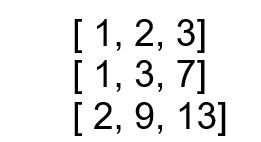

Ninja wants to develop the Square City. So, he selects the ‘K’the building with minimum floors and plans to work on it. As he is busy deciding the design and infrastructure for that building, he asks you for help.

For Example: For the given Square City and ‘K’ = 4, the 4th building having the minimum number of floors is at (2,0) and having 11 floors.

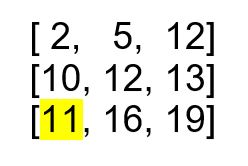

Can you help Ninja find the building with ‘K’the building with minimum floors?

Detailed explanation ( Input/output format, Notes, Images )
Input Format :

The first line of input contains an integer ‘T’ denoting the number of test cases. Then each test case follows.

The first line of each test case contains two single space-separated integers ‘N’ and ‘K’ where ‘N’ represents the size (number of rows or columns) of Square City and 'K' denotes the Kth building with minimum floors, respectively.

The next ‘N’ lines of each test case contain ‘N’ single space-separated integers denoting the number of floors in each building.
Output Format :

For each test case, print the number of floors in the ‘K’th’ building with minimum floors.

Print the output of each test case in a separate line.
Note :

You are not required to print the expected output; it has already been taken care of. Just implement the function.
Constraints :

1 <= T <= 100
1 <= N <= 100
1 <= K <= N
1 <= Square City[i][j] <= 10^6

where 'Square City[i][j]' denotes the number of floors in a row and column wise sorted matrix 'Square City'.

Time limit: 1 sec

In [ ]:
import heapq

def kMinFloor(squareCity, n, k):
  heap = []

  for i in range(n):
    heap.extend(squareCity[i])

  heapq.heapify(heap)
  return heapq.nsmallest(k, heap)[-1]